In [2]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

<IPython.core.display.Javascript object>

`%matplotlib` prevents importing * from pylab and numpy


Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\biax-compression-example
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\biax-compression-example
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
base = r"U:\20151006 kleinere compressie"
setje = r"20151012T024959"

In [3]:
import glob
glob.glob(base + "/" + setje + "*")

['U:\\20151006 kleinere compressie\\20151012T024959']

In [4]:
B0 = 916000
CD0 = 1144000

cst = 4.95e-5 # mm/pulse
cim = 60e-3 # mm/px 

A at t=0: 2521.9 mm2
deltaA at t=0: 209.4 mm2
Aj: 2312.5 mm2
Afoam: 1947.2 mm2
Phi at t=0: 0.77


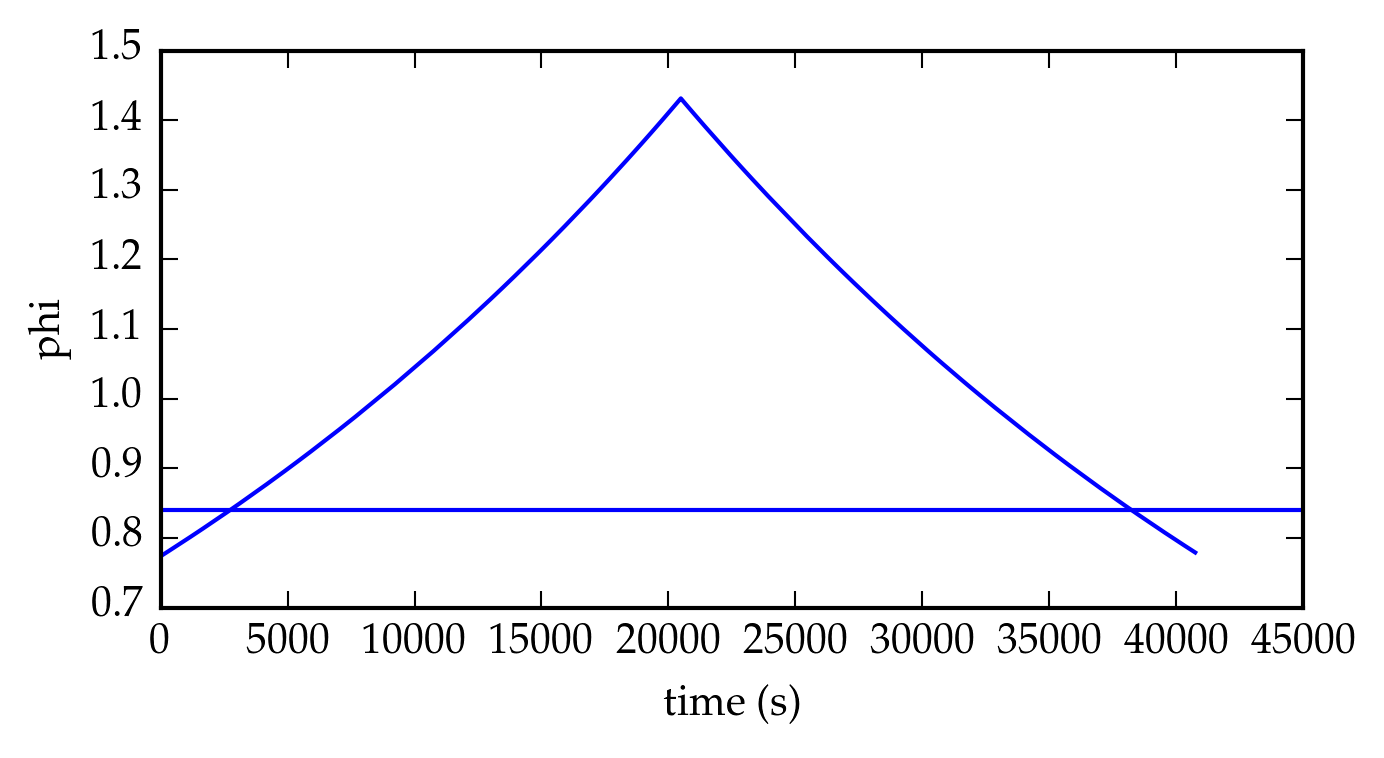

In [5]:
deltaA_px2 = 58167 # px^2
deltaA_mm2 = deltaA_px2 * (cim)**2

t,frameno,Bpos,CDpos = np.loadtxt(base + "/" + setje + "/position.csv").T


A_pl2 = (B0+Bpos) * (CD0+CDpos)
A_mm2 = A_pl2 * (cst)**2



print "A at t=0: %.1f mm2" % (A_mm2[0])
print "deltaA at t=0: %.1f mm2" % (deltaA_mm2)

Aj_mm2 = A_mm2[0] - deltaA_mm2
Afoam_mm2 = Aj_mm2 * 0.842

print "Aj: %.1f mm2" % Aj_mm2
print "Afoam: %.1f mm2" % Afoam_mm2

print "Phi at t=0: %.2f" % (Afoam_mm2 / A_mm2[0])

phi = Afoam_mm2 / A_mm2

plt.plot(t, phi)
plt.xlabel("time (s)")
plt.ylabel("phi")
plt.axhline("0.84")

In [6]:
vardata = np.load(base + "/vardt/" + setje + "/alldt.npy")
print vardata.shape

(50, 40689)


In [7]:
crop_npix = 200*200

C:\Python27\lib\site-packages\ipykernel\__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Python27\lib\site-packages\ipykernel\__main__.py:55: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0.8 1099 0.0 5000.0
0.85 3120 0.0 5000.0
0.9 5025 5000.0 10000.0
0.95 6827 5000.0 10000.0
1.0 8537 5000.0 10000.0
1.05 10163 10000.0 15000.0
1.1 11714 10000.0 15000.0
1.15 13196 10000.0 15000.0
1.2 14614 10000.0 15000.0
1.25 15975 15000.0 20000.0
1.3 17283 15000.0 20000.0
1.35 18541 15000.0 20000.0
1.4 19753 15000.0 20000.0
\includegraphics{notebooks/biax-compression-example/compression-multiplot.pdf}


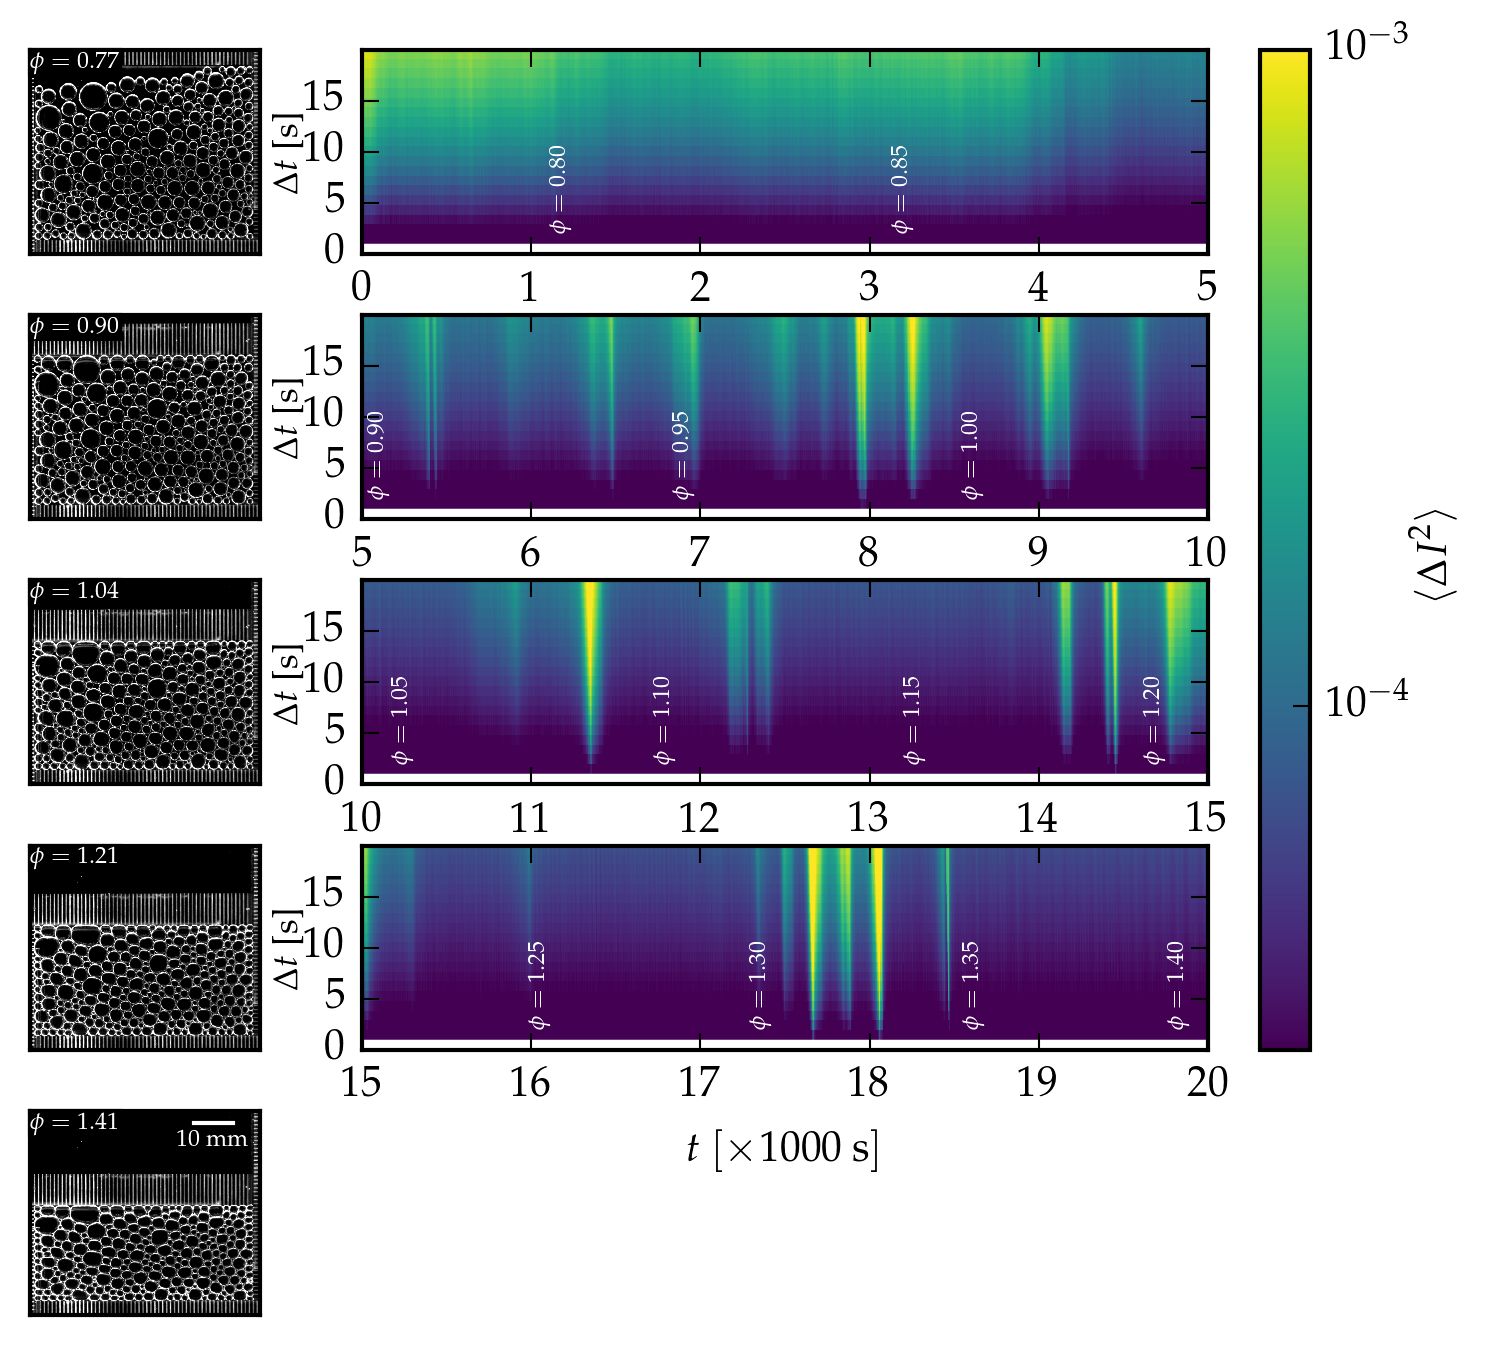

In [22]:
import matplotlib.gridspec as gridspec

# we gaan nu een moeilijk plotje maken.
# hoge plot. vijf rijen. links snapshot foam, rechts vardt trace
# 0.76-1.84-0.92
# 0.92-...-1.08
# 1.08-...-1.24
# 1.24-...-1.40
# bottom row alleen snapshot foam
# rechts colorbar heatmap foam
# colormap = viridis
# scale is misschien iets anders dan eerder want andere belichting. ugh.

fullfig(hf=2)
gs = gridspec.GridSpec(5, 4)
gs.update(left=0, hspace=0.3, bottom=0.1, top=0.98)

edges = np.linspace(0,20000,5)
start = edges[:-1]
end = edges[1:]

norm = matplotlib.colors.LogNorm(vmin=3e-5, vmax=1e-3)
cmap = plt.get_cmap('viridis')

markers = np.arange(0.8,1.41,0.05)
markers_where = np.int_(np.round(np.interp(markers, phi[:20000], np.arange(20000))))

for i,s in enumerate(list(start) + [end[-1]]):
    ax = plt.subplot(gs[i,0])
    ax.imshow(plt.imread("%s/%s/%05i.png" % (base,setje,s))[10:900,128:-150],
              cmap='gray', vmin=0.05, vmax=0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis(ax.axis())
    plt.text(0, 0,
             r"$\phi=%0.2f$" % phi[s],
             color='white',
             fontsize='xx-small',
             bbox=dict(facecolor='black', pad=0),
             ha='left',
             va='top',
    )
    
l = 10/cim
ax.plot([800-l/2,800+l/2], [50,50], color='white')
ax.text(800, 75, '10 mm', color='white', fontsize='xx-small', ha='center', va='top')

#plt.savefig('compression-multiplot.pdf')

cbax = []
for i,(s,e) in enumerate(zip(start,end)):
    ax = plt.subplot(gs[i,1:])
    cbax.append(ax)
    m = ax.imshow(
        vardata[:20,s:e] / crop_npix,
        origin='lower',
        aspect='auto',
        interpolation='nearest',
        extent=(s/1000,e/1000,1,20),
        norm=norm,
        cmap=cmap
    )
    ax.set_xticks(np.arange(s/1000, e/1000+1))
    ax.set_ylabel('$\Delta t$ [s]', labelpad=-1, fontsize='small')
    ax.set_yticks([0,5,10,15])
    
    for marker,idx in zip(markers, markers_where):
        if s<idx<e:
            print marker,idx,s,e
            ax.text(idx/1000., 2,
                    r"$\phi=%0.2f$" % marker, va='bottom', ha='left',
                    rotation=90,
                    fontsize='xx-small',
                    color='white')
    
ax.set_xlabel(r'$t~[\times 1000~\textrm{s}]$')

cb = plt.colorbar(m, ax=cbax)
cb.set_label(r'$\langle\Delta I^2\rangle$', labelpad=0)

plt.savefig('compression-multiplot.pdf')